영업장_메뉴 -> 영업장, 메뉴로 컬럼 분리

In [5]:
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('train/train.csv')

# 업장명 리스트
store_names = [
    '느티나무', '담하', '라그로타', '미라시아', '연회장',
    '카페테리아', '포레스트릿', '화담숲주막', '화담숲카페'
]

# 업장/메뉴 분리 함수
def split_store_menu_by_list(x):
    for store in store_names:
        if x.startswith(store):
            return store, x[len(store):].lstrip(' _')  # 앞의 공백/언더바 제거
    return x, ''  # 매칭 안 되면 전체를 영업장으로

# 분리 적용
train[['영업장', '메뉴']] = train['영업장명_메뉴명'].apply(lambda x: pd.Series(split_store_menu_by_list(x)))
train = train.drop(columns=['영업장명_메뉴명'])

# 결과 확인
print(train.head(20))

          영업일자  매출수량   영업장             메뉴
0   2023-01-01     0  느티나무  셀프BBQ_1인 수저세트
1   2023-01-02     0  느티나무  셀프BBQ_1인 수저세트
2   2023-01-03     0  느티나무  셀프BBQ_1인 수저세트
3   2023-01-04     0  느티나무  셀프BBQ_1인 수저세트
4   2023-01-05     0  느티나무  셀프BBQ_1인 수저세트
5   2023-01-06     0  느티나무  셀프BBQ_1인 수저세트
6   2023-01-07     0  느티나무  셀프BBQ_1인 수저세트
7   2023-01-08     0  느티나무  셀프BBQ_1인 수저세트
8   2023-01-09     0  느티나무  셀프BBQ_1인 수저세트
9   2023-01-10     0  느티나무  셀프BBQ_1인 수저세트
10  2023-01-11     0  느티나무  셀프BBQ_1인 수저세트
11  2023-01-12     0  느티나무  셀프BBQ_1인 수저세트
12  2023-01-13     0  느티나무  셀프BBQ_1인 수저세트
13  2023-01-14     0  느티나무  셀프BBQ_1인 수저세트
14  2023-01-15     0  느티나무  셀프BBQ_1인 수저세트
15  2023-01-16     0  느티나무  셀프BBQ_1인 수저세트
16  2023-01-17     8  느티나무  셀프BBQ_1인 수저세트
17  2023-01-18     0  느티나무  셀프BBQ_1인 수저세트
18  2023-01-19     0  느티나무  셀프BBQ_1인 수저세트
19  2023-01-20     0  느티나무  셀프BBQ_1인 수저세트


In [6]:
print("영업장 종류 목록:")
for name in train['영업장'].unique():
    print(name)
print(f"총 {train['영업장'].nunique()}개")

영업장 종류 목록:
느티나무
담하
라그로타
미라시아
연회장
카페테리아
포레스트릿
화담숲주막
화담숲카페
총 9개


시간대 별 총 매출수량

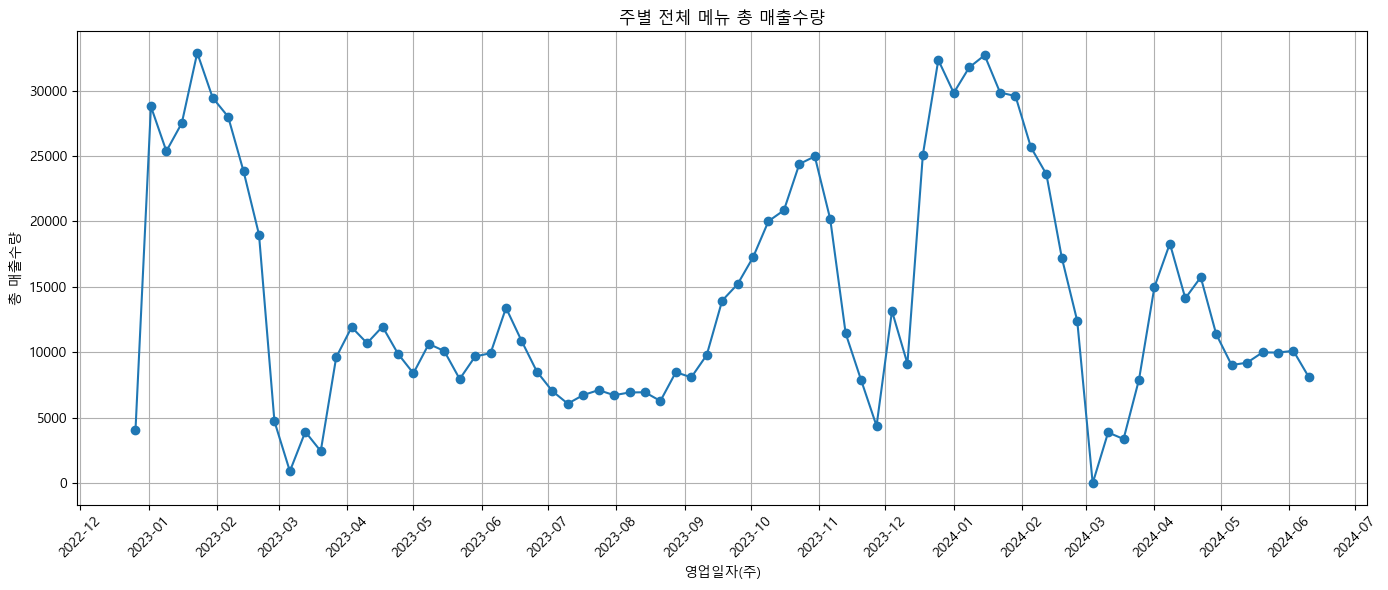

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # 월별 x축 간격을 위해 추가

# 한글 폰트 설정 (윈도우: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 영업일자를 datetime으로 변환
train['영업일자'] = pd.to_datetime(train['영업일자'])

# 주 단위로 묶어서 매출수량 합계 구하기
train['주'] = train['영업일자'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = train.groupby('주')['매출수량'].sum().reset_index()

# x축이 datetime 타입이 아니면 변환
weekly_sales['주'] = pd.to_datetime(weekly_sales['주'])

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales['주'], weekly_sales['매출수량'], marker='o')
plt.title('주별 전체 메뉴 총 매출수량')
plt.xlabel('영업일자(주)')
plt.ylabel('총 매출수량')
plt.grid(True)

# x축을 1개월 간격으로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1개월 간격
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 형식

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

업장 별 메뉴 상관관계 히트맵

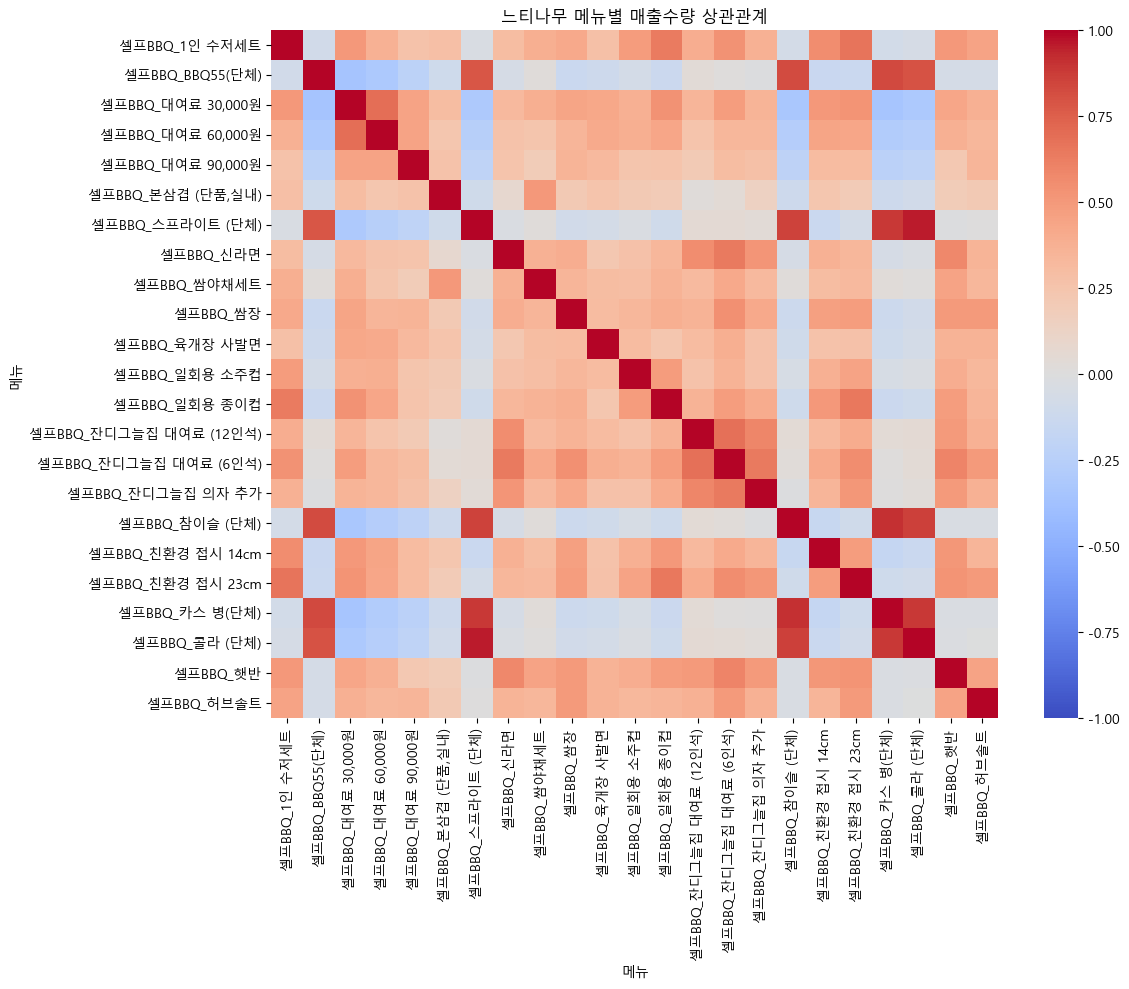

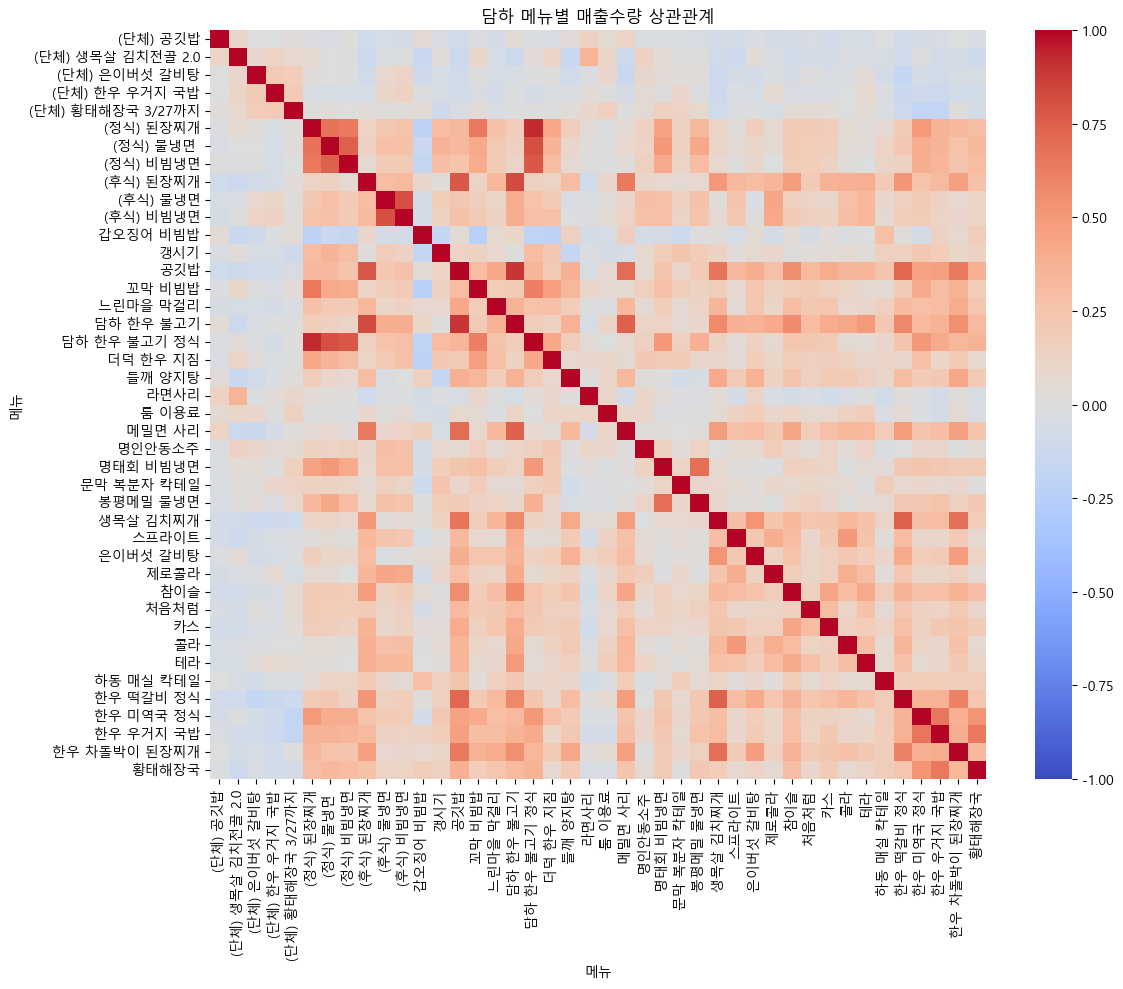

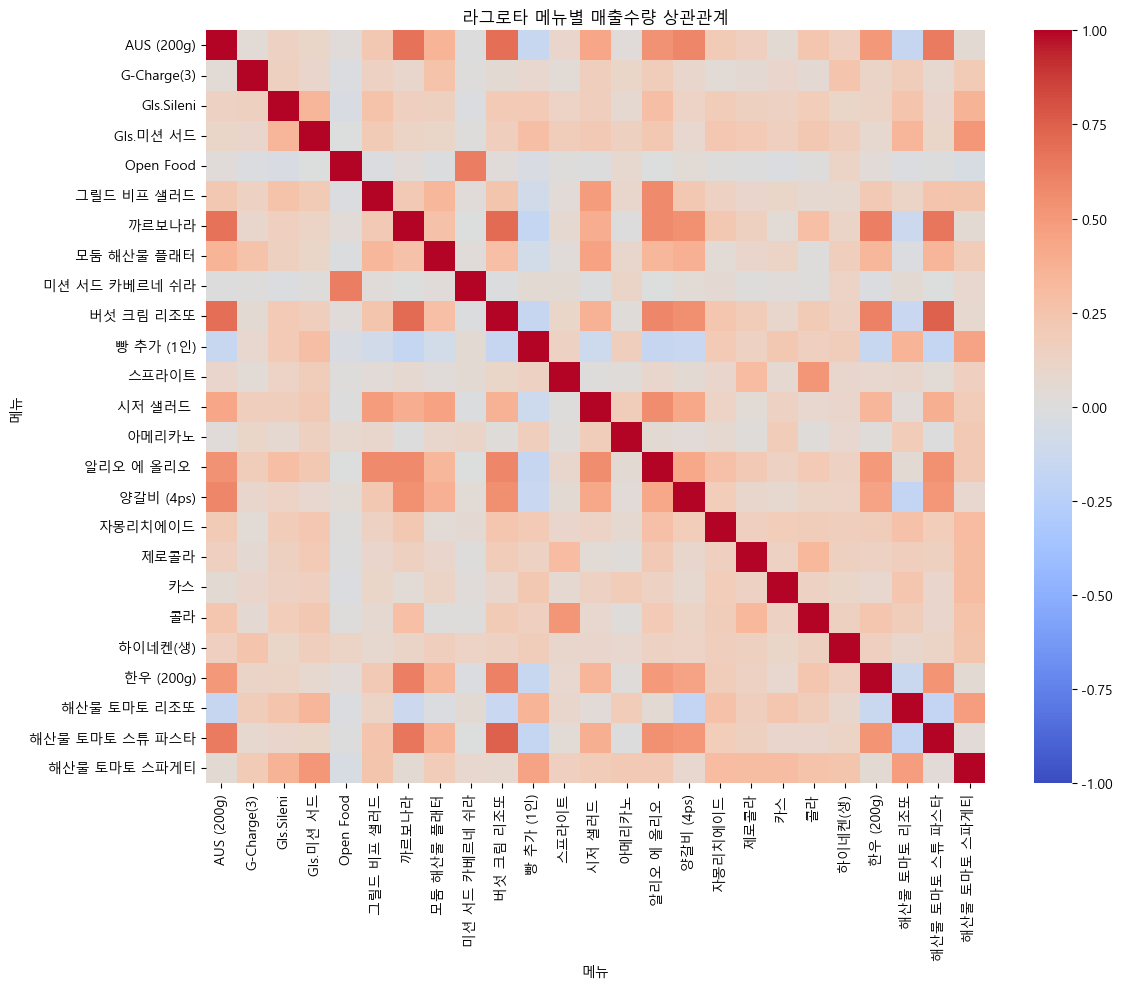

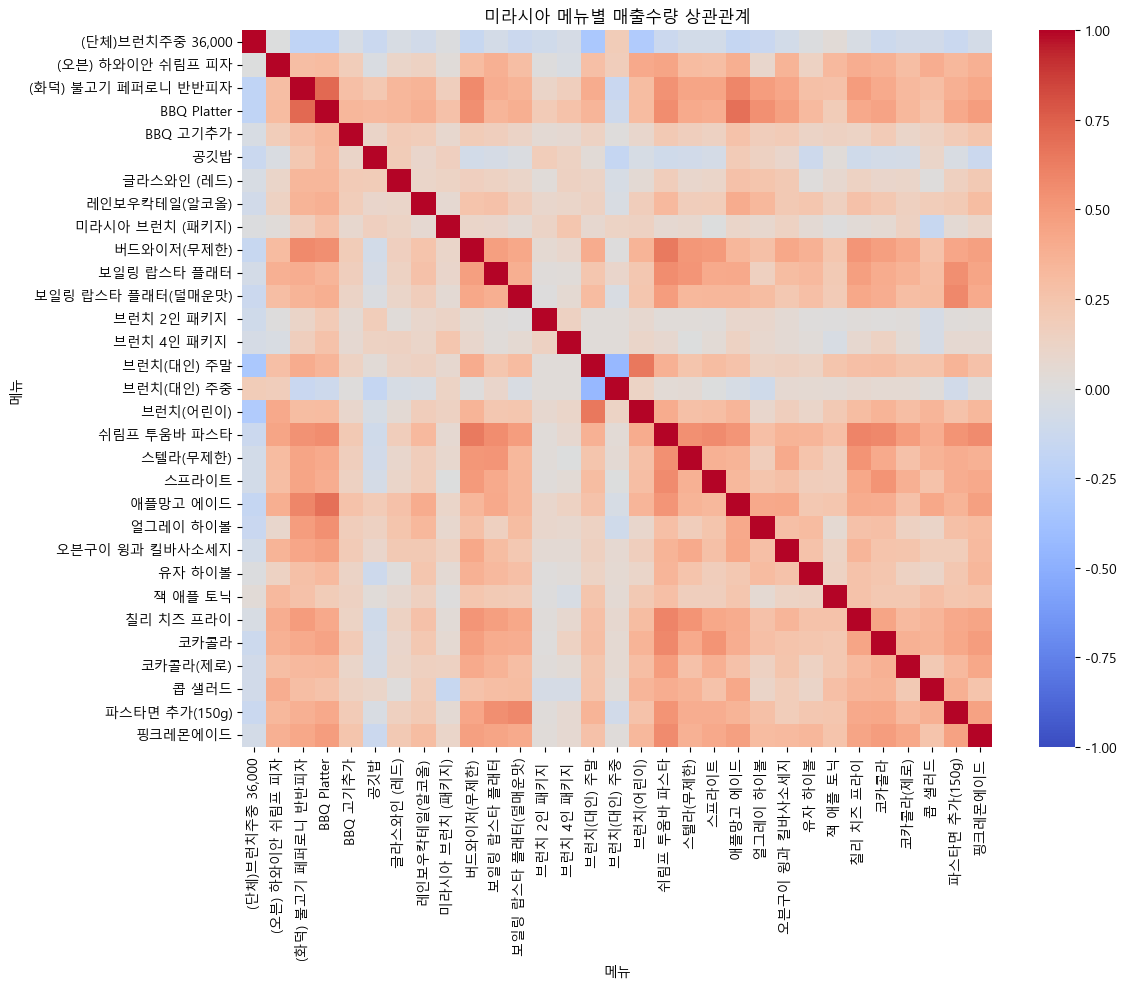

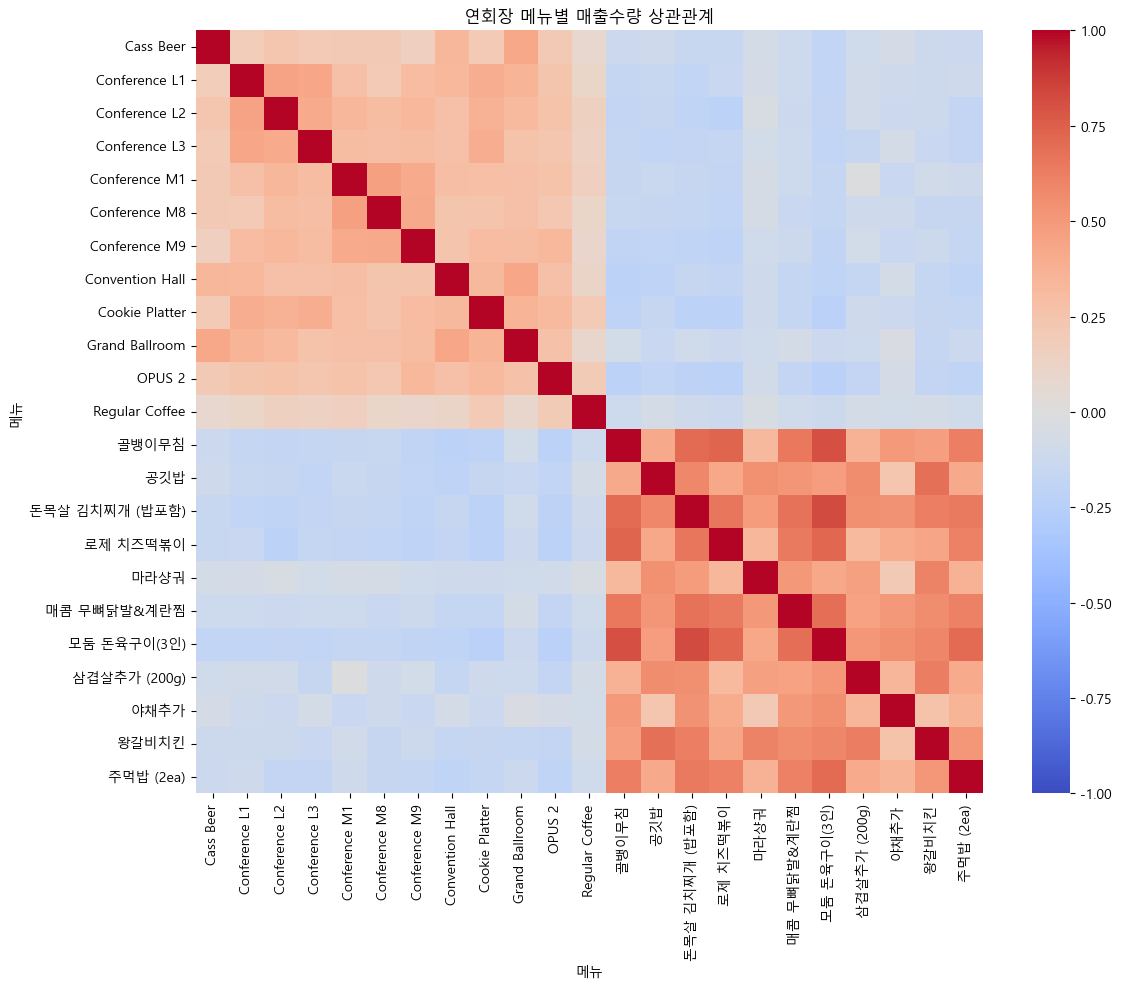

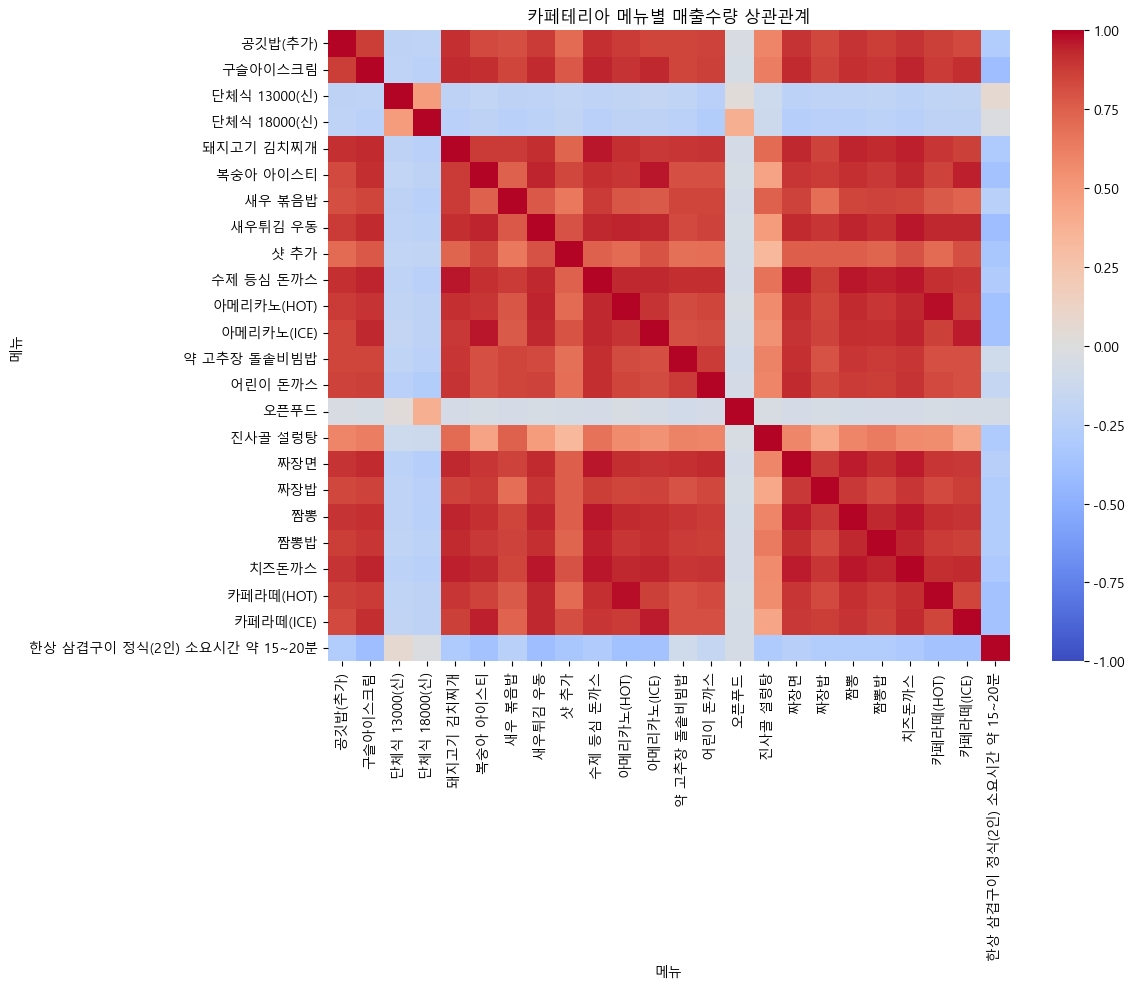

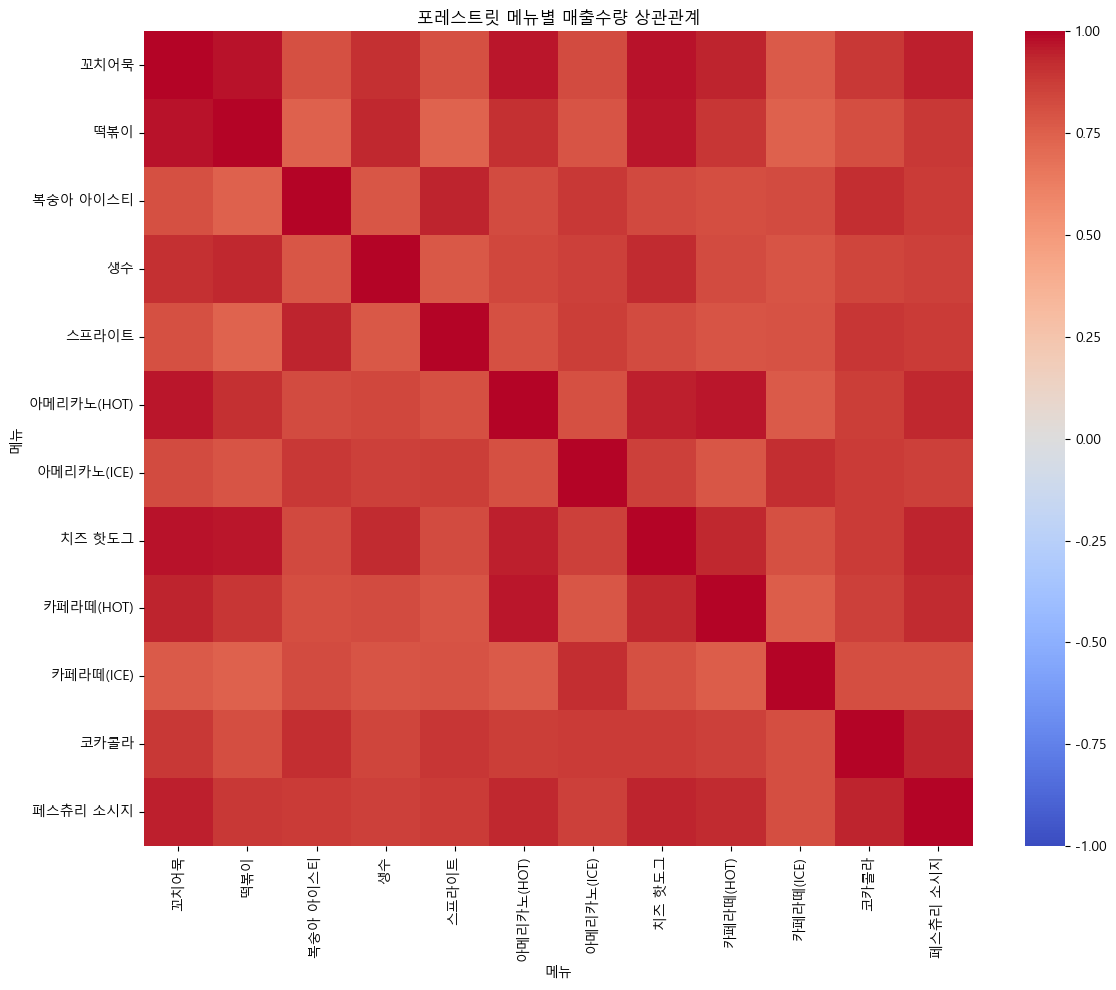

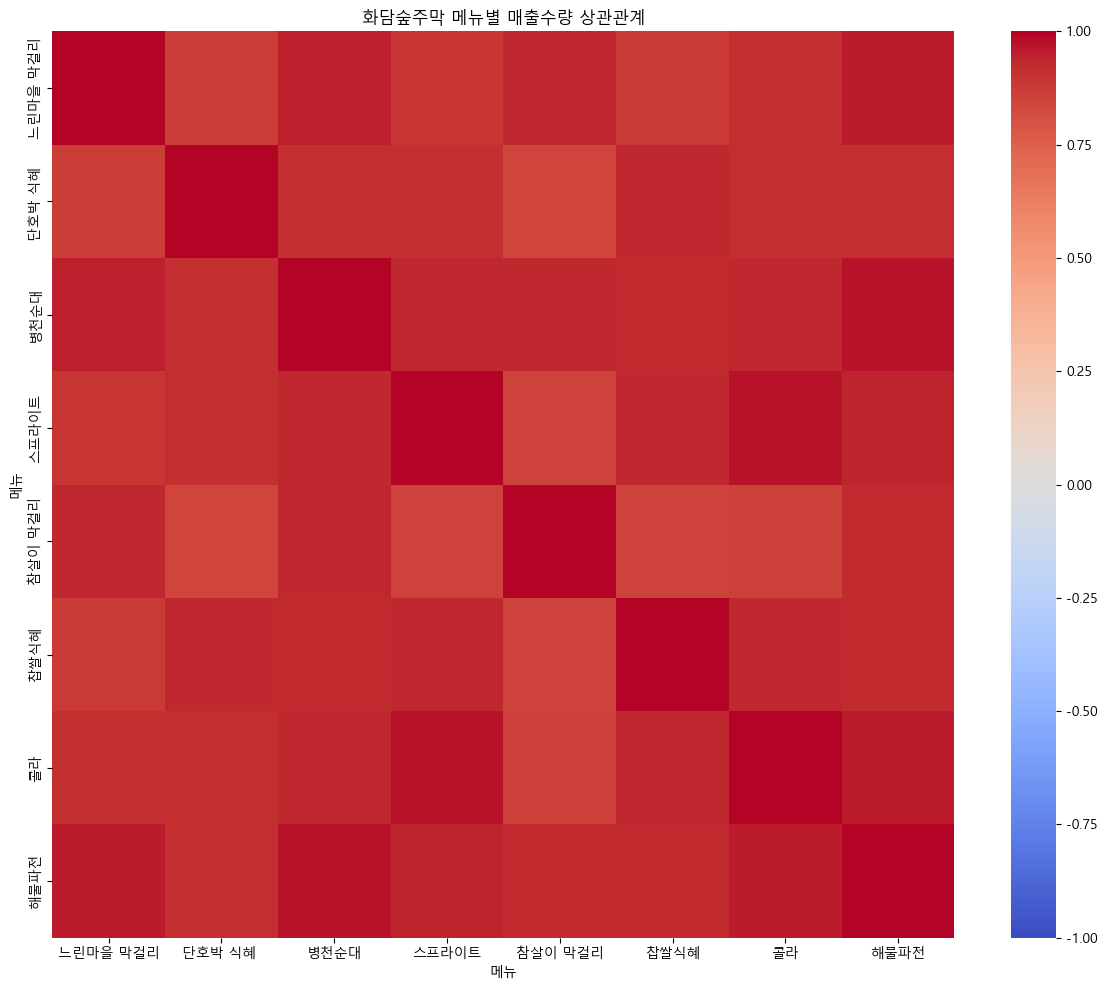

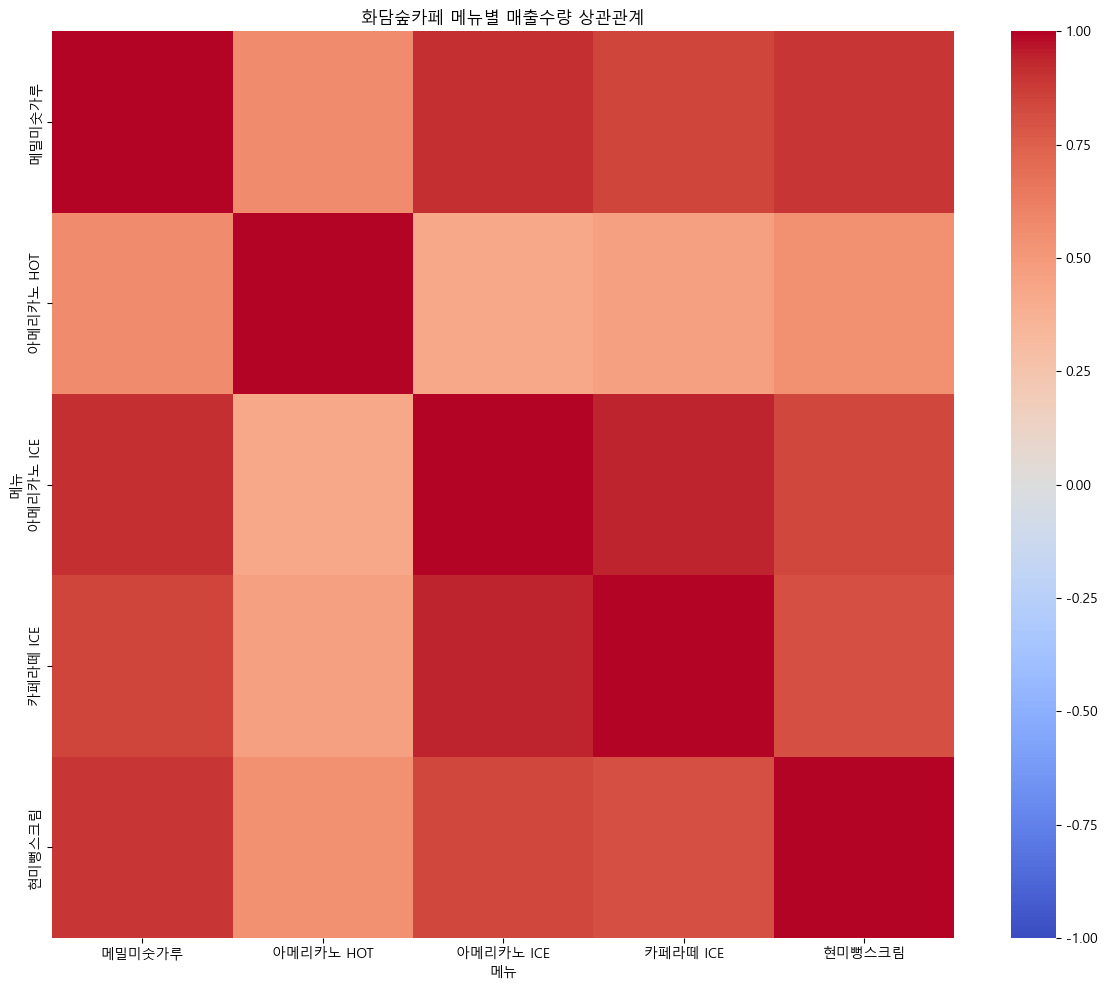

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시: 첫 번째 업장만
for store in train['영업장'].unique():  # [:1]은 예시, 전체는 반복문 돌리면 됨
    temp = train[train['영업장'] == store]
    # 일자-메뉴별 매출수량 피벗테이블
    pivot = temp.pivot_table(index='영업일자', columns='메뉴', values='매출수량', fill_value=0)
    # 상관계수 계산
    corr = pivot.corr()
    
    # 히트맵 시각화
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f"{store} 메뉴별 매출수량 상관관계")
    plt.tight_layout()
    plt.show()

업장 별 매출수량

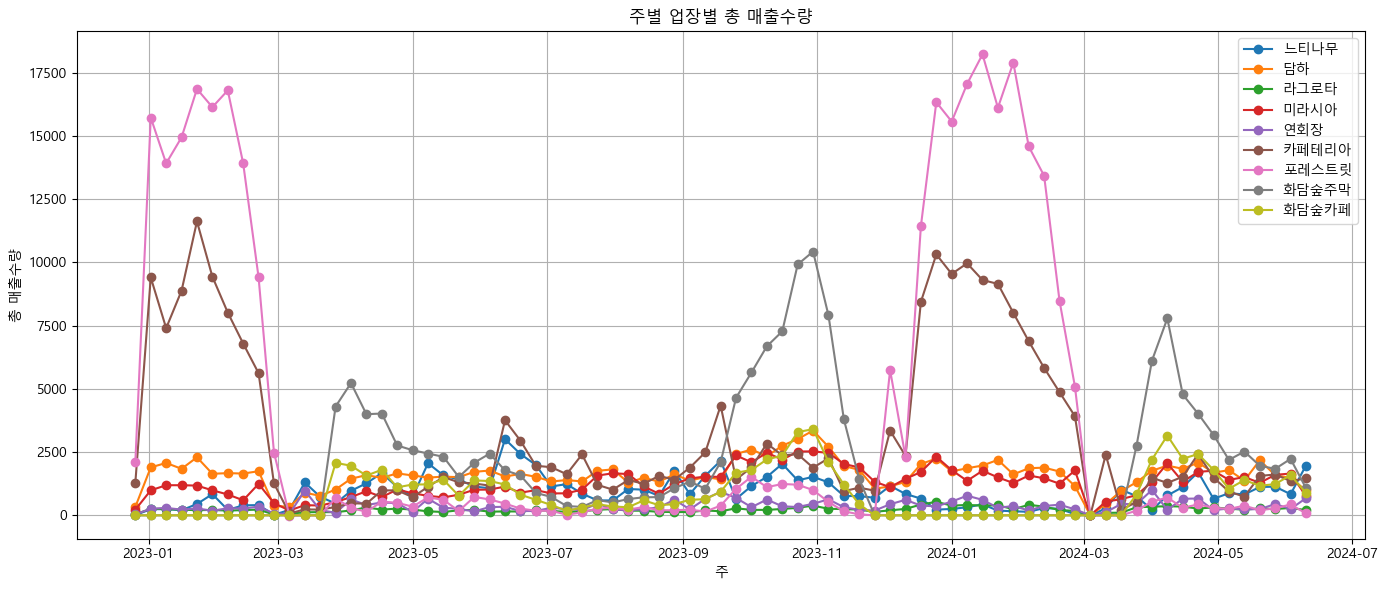

In [9]:
import matplotlib.pyplot as plt

# 영업일자를 datetime으로 변환
train['영업일자'] = pd.to_datetime(train['영업일자'])

# 업장별, 주별 총 매출수량 집계
train['주'] = train['영업일자'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_store_sales = train.groupby(['주', '영업장'])['매출수량'].sum().reset_index()

# 피벗: index=주, columns=영업장, values=매출수량
pivot = weekly_store_sales.pivot(index='주', columns='영업장', values='매출수량').fillna(0)

# 시계열 그래프
plt.figure(figsize=(14, 6))
for store in pivot.columns:
    plt.plot(pivot.index, pivot[store], marker='o', label=store)
plt.title('주별 업장별 총 매출수량')
plt.xlabel('주')
plt.ylabel('총 매출수량')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

업장별 매출수량 상관관계

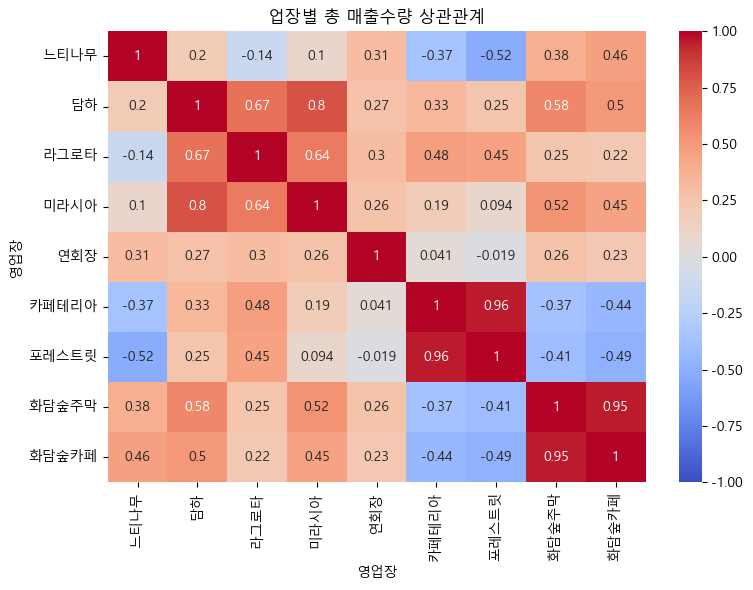

In [10]:
import seaborn as sns

# 업장별 총 매출수량 피벗테이블에서 상관계수 계산
corr = pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('업장별 총 매출수량 상관관계')
plt.tight_layout()
plt.show()